# Introduction to Quantum Computing with Neutrino Oscillation

## Single Qubits

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\ket}[1]{\left|\,{#1}\right\rangle}$$
Quantum computing involves operating on quantum states which can take on two different values when measured. In analogy to classical bits, we usually label the two values 0 and 1. It is convenient to label these states using vectors:

$$
\ket{0}=
\begin{pmatrix}
1 \\0
\end{pmatrix};\,
\ket{1}=
\begin{pmatrix}
0 \\ 1
\end{pmatrix}
$$

In contrast with classical bits, qubits can be in a combination of states before being measured. In this case, we will measure 0 or 1 with some probability. Let us consider a general qubit state $\ket{q}$:
$$
\ket{q} = 
\begin{pmatrix}
a \\ b
\end{pmatrix}
$$

In this case, when we measure $\ket{q}$, we will get 0 with probability $a^{2}$ and 1 with probability $b^{2}$. Since we can only measure 0 or 1, and the probability of getting *something* must be 1, we find that $a^{2}+b^{2}=1$.

This is very technical, but let us try to gain some intuition for qubits and operations.

We can visualize our states as living on a *Bloch Sphere*. On this sphere, the north pole is the $\ket{0}$ state, and the south pole is the $\ket{1}$ state. The operations that we can perform with a quantum computer move the state around the rest of the sphere.

In [30]:
## Bloch sphere visualizations

## Multiple qubits

In [32]:
## More Bloch sphere visualizations but now showing how things can get complicated
## Maybe a discussion of unitarity being probability (length) conserving

## Neutrino oscillations

Earlier today we discussed neutrino oscillations in which a neutrino that starts as one type may change into another as it moves through space. Like the operations we perform on a qubit, the transformation from flavor-basis to mass-basis and time-evolution are unitary operations, and so it is natural that we may try to perform neutrino oscillations on a quantum computer. The question then becomes "how do we represent these transformations in the language of quantum computing?"

To begin, we will demonstrate how to do this in the simplified two-neutrino case. In this scenario, the neutrino mass- and flavor-bases are related in the following manner.

$$
\begin{pmatrix}
\nu_{e} \\ \nu_{\mu}
\end{pmatrix}
=
\begin{pmatrix}
\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta
\end{pmatrix}
\begin{pmatrix}
\nu_{1} \\ \nu_{2}
\end{pmatrix}
$$

We may further recall that the most general operation that we can write on a qubit, the $U_{3}$ operation, is given by:

$$
U_{3}\left(\Theta,\Phi,\Psi\right)
=
\begin{pmatrix}
\cos\frac{\Theta}{2} & -e^{i\Phi}\sin\frac{\Theta}{2} \\
e^{i\Psi}\sin\frac{\Theta}{2} & e^{i(\Phi+\Psi)}\cos\frac{\Theta}{2}
\end{pmatrix}
$$

If we take $\Theta=2\theta$, $\Phi=\Psi=0$, we get:

$$
U_{3}\left(2\theta,0,0\right) =
\begin{pmatrix}
\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta
\end{pmatrix}
$$

And thus we are able to recover the PMNS matrix! The time evolution operator is given by:

$$
\begin{pmatrix}
0&0\\0&e^{i\frac{\Delta m^2}{2E}t}
\end{pmatrix}
$$

If we choose $\Theta=\Psi=0$ and $\Phi=\frac{\Delta m^2}{2E}t$, we get:

$$
U_{3}\left(0, \frac{\Delta m^2}{2E}t, 0\right) =
\begin{pmatrix}
0&0\\0&e^{i\frac{\Delta m^2}{2E}t}
\end{pmatrix}
$$

And we are once again able to recover our desired matrix!

In [42]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

### Make quantum circuit for one time and draw it

In [160]:
# TODO: direct them to actual numbers
mixing_angle = np.radians(20)
Delta_m      = 1.0e6 # Arbitrary units
E            = 20 # GeV

# Make a one qubit quantum register
qreg = QuantumRegister(1)
# Make a one bit classical register that we will read results on
creg = ClassicalRegister(1)
# Make a quantum circuit
qc   = QuantumCircuit(qreg, creg)
qc.u(-2*mixing_angle,0,0, qreg) # PMNS dagger
qc.u(0, 0.5*Delta_m/(2*E), 0, qreg)
qc.u(2*mixing_angle, 0, 0, qreg)
qc.measure(qreg, creg)
qc.draw()

┌──────────────┐┌──────────────┐┌─────────────┐┌─┐
q33719_0: ┤ U(-2π/9,0,0) ├┤ U(0,12500,0) ├┤ U(2π/9,0,0) ├┤M├
          └──────────────┘└──────────────┘└─────────────┘└╥┘
c10315: 1/════════════════════════════════════════════════╩═
                                                          0

### Plot the results for different times

In [158]:
tt      = np.linspace(0, 2, 200) # Arbitrary units
results = np.zeros(len(tt))
n_runs  = 1000

for i,t in enumerate(tt):
    # Make a one qubit quantum register
    qreg = qiskit.QuantumRegister(1)
    # Make a one bit classical register that we will read results on
    creg = qiskit.ClassicalRegister(1)
    # Make a quantum circuit
    qc   = qiskit.QuantumCircuit(qreg, creg)
    qc.u(-2*mixing_angle,0,0, qreg) # PMNS dagger
    qc.u(0, t*Delta_m/(2*E), 0, qreg)
    qc.u(2*mixing_angle, 0, 0, qreg)
    qc.measure(qreg, creg)
    job    = execute(qc, Aer.get_backend('qasm_simulator'), shots=n_runs) # Run it n_runs times on a simulator
    counts = job.result().get_counts(qc)
    try:
        results[i] = counts['1']/float(n_runs)
    except KeyError:
        results[i] = 0.

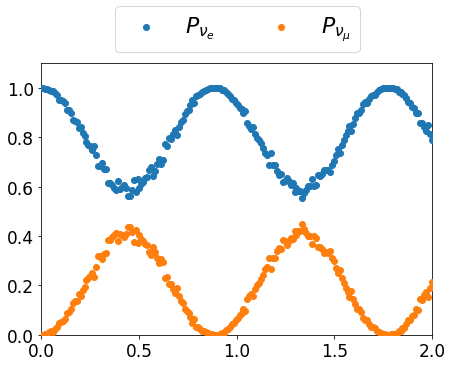

In [159]:
# TODO move into function. Add lines from classical calc
fig, ax = plt.subplots(figsize=(7,5))

ax.scatter(tt, 1-results, label=r'$P_{\nu_{e}}}$', zorder=10)
ax.scatter(tt, results, label=r'$P_{\nu_{\mu}}}$', zorder=10)
plt.xticks([0,0.5,1,1.5,2], fontsize=17)
plt.yticks([0,0.2,0.4,0.6,0.8,1,], fontsize=17)
ax.set_xlim(0, 2)
ax.set_ylim(0,1.1)
# ax.axhline(1, lw=3, alpha=0.2, zorder=1, color='k')
plt.legend(ncol=2, fontsize=22, bbox_to_anchor=(0.16,1))
plt.show()